# Patient Risk Modeling for Heart Disease Risk


## Problem Context

- About 655,000 Americans die from heart disease each year—that’s 1 in every 4 deaths.
- One person dies every 36 seconds in the United States from cardiovascular disease
- Coronary heart disease is the most common type of heart disease, killing 365,914 people in 2017
- Heart disease costs the United States about $219 billion each year from 2014 to 2015.This includes the cost of health care services, medicines, and lost productivity due to death.
- Common Causes of some sort of heart disease
    - Overweight/Obesity
    - Diabetes
    - High Blood Pressure
    - High Cholesterol
    - Smoking

Predictive models play a crucial role in the healthcare sector, providing a tool to identify high-risk patients, predict disease progression, and assist in the decision-making process for personalized treatment plans. In this notebook, we will focus on creating a predictive model for heart disease risk. The risk model can support clinicians in diagnosing potential heart diseases earlier, thereby increasing the chance of effective treatment and improving the overall patient care process.

## Dataset

The dataset used for this analysis is taken from the UCI Machine Learning Repository. Specifically, we use the Cleveland Heart Disease dataset, which is one of the most widely used datasets for heart disease prediction. The dataset contains patient records and a number of predictors relating to their medical history, lab test results, and lifestyle. 

## Data Dictionary

The dataset comprises the following attributes:

- **age**: Patient's age in years
- **sex**: Patient's sex (1 = male, 0 = female)
- **cp**: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- **trestbps**: Resting blood pressure in mm Hg
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thallium stress test result (3 = normal, 6 = fixed defect, 7 = reversible defect)
- **target**: Heart disease diagnosis (0 = no disease, 1 = disease)

Through exploratory data analysis, data preprocessing, feature importance analysis, and machine learning models implementation, we will attempt to create a predictive model for heart disease diagnosis.

## 1. Import libraries and data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
df = pd.read_excel("Heart Disease.xlsx")

In [3]:
# Perform Exploratory Analysis
print(df.head())
print(df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0     0.0  
1    2.0  3.0   3.0     1.0  
2    2.0  2.0   7.0     1.0  
3    3.0  0.0   3.0     0.0  
4    1.0  0.0   3.0     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303

In [4]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(df)

# Determine the cluster labels of new_points: labels
labels = model.predict(df)

# Print cluster labels of new_points
print(labels)

[0 0 0 0 2 0 0 1 0 2 2 1 0 0 2 2 0 0 0 0 2 0 0 2 2 2 1 0 0 2 0 0 1 0 0 2 2
 0 1 0 0 2 1 2 1 0 2 0 1 2 2 2 1 2 0 0 0 2 0 2 1 2 2 1 2 0 2 0 1 0 0 0 0 0
 2 1 0 1 0 0 2 0 1 0 1 0 0 2 0 0 1 2 0 2 0 0 0 0 2 2 0 2 1 0 2 1 2 0 0 2 1
 0 2 1 0 2 2 2 1 0 0 1 2 2 0 0 1 0 2 2 0 2 2 0 2 0 2 0 2 0 2 1 2 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 2 1 2 0 0 2 2 1 0 2 0 0 0 1 2 0 0 2 1 0 0 1 0 0 1
 2 0 0 1 0 2 1 0 1 2 1 0 0 0 0 0 1 2 1 2 1 0 2 0 0 2 0 2 0 0 2 2 0 1 0 0 0
 2 0 0 2 2 0 2 2 2 1 2 0 2 0 0 0 0 1 0 1 0 0 2 0 0 0 2 2 2 2 0 1 1 2 2 2 0
 0 0 1 0 2 2 1 2 2 2 2 2 0 1 2 2 0 0 2 0 2 1 0 2 2 2 1 0 2 2 0 2 1 2 2 2 2
 2 0 0 2 2 0 2]


In this code, we are creating a KMeans instance with 3 clusters, fitting the model to the data, and predicting the cluster labels. The output will be the cluster labels for each data point.

Note: Adjust the number of clusters according to your specific needs and data. It's always a good practice to use methods such as the Elbow method or Silhouette analysis to determine the optimal number of clusters.

To plot the clusters of data after applying KMeans, you can use a scatter plot. However, as KMeans has been applied to the data in its original high-dimensional space, and matplotlib allows us to plot in 2D or 3D, we can't directly visualize all the dimensions at once. This is where PCA comes in handy.

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

X_pca is a version of df that has been transformed down to 2 dimensions (or components). These 2 dimensions are chosen to capture as much of the variation in the original data as possible.

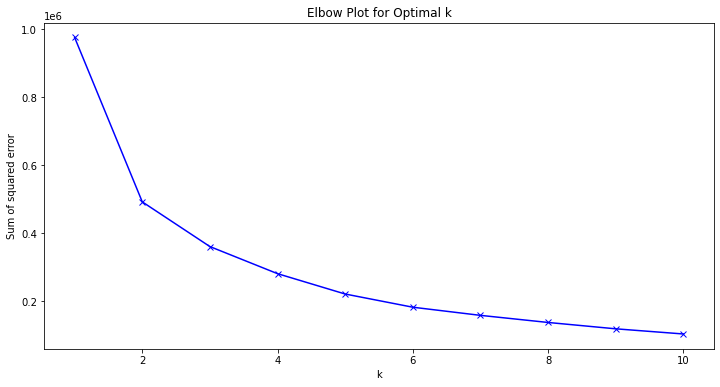

In [8]:
# Determine optimal number of clusters using the elbow method
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_pca) # Fit on the PCA-transformed data
    sse.append(km.inertia_) 

# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot for Optimal k')
plt.show()

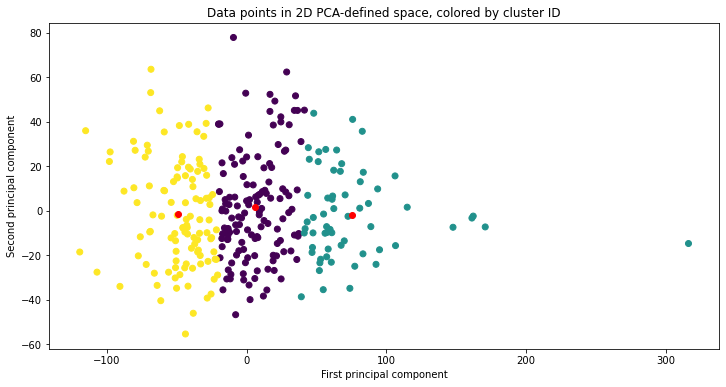

In [9]:
# Now, let's say that the elbow plot suggested 3 clusters.
km = KMeans(n_clusters=3)
km.fit(X_pca)

# Plotting clusters
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red') # plot cluster centers
plt.title('Data points in 2D PCA-defined space, colored by cluster ID')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()